# Template to use as a pipelining in ML Process

## 1. Prepare problems
    * Load libraries
    * Load dataset
    
## 2. Summarize Data
    * Descriptive statistics
    * Data visualization
    
## 3. Prepare Data
    * Data cleaning
    * Feature Selection
    * Data transforms
    
## 4. Evaluate Algorithms
    * Split train-test algo
    * Test options and evaluation metrics
    * Spot check algo.
    * Compare algo.

## 5. Improve accuracy
    * Algo. tuning
    * Ensembles
    
## 6. Finalize Model
    * Predictions on validation dataset
    * Create a standalone model on entire training dataset
    * Save model for later use

In [1]:
# importing libraries
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# load datasets
filename='iris.data.csv'
names= ['s-length','s-width','p-length','p-width','label']
dataset= read_csv(filename, names= names)

In [7]:
# summarize data
print('Shape: ', dataset.shape,'\n')

print(dataset.head(5),'\n')

print(dataset.info(),'\n')

print(dataset.describe())

print(dataset.groupby('label').size())

Shape:  (150, 5) 

   s-length  s-width  p-length  p-width        label
0       5.1      3.5       1.4      0.2  Iris-setosa
1       4.9      3.0       1.4      0.2  Iris-setosa
2       4.7      3.2       1.3      0.2  Iris-setosa
3       4.6      3.1       1.5      0.2  Iris-setosa
4       5.0      3.6       1.4      0.2  Iris-setosa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
s-length    150 non-null float64
s-width     150 non-null float64
p-length    150 non-null float64
p-width     150 non-null float64
label       150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None 

         s-length     s-width    p-length     p-width
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5

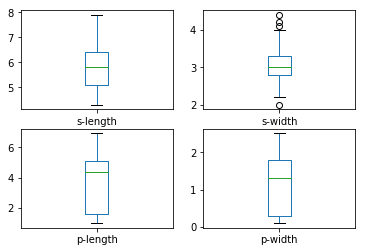

In [9]:
# univariate plots

# box plot
dataset.plot(kind='box', subplots=True, layout=(2,2))
pyplot.show()

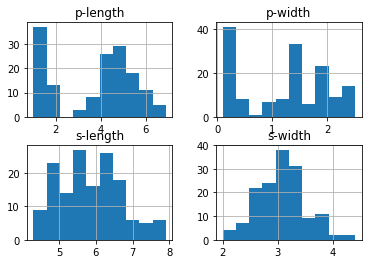

In [13]:
# histogram
dataset.hist()
pyplot.show()

/home/kuldeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


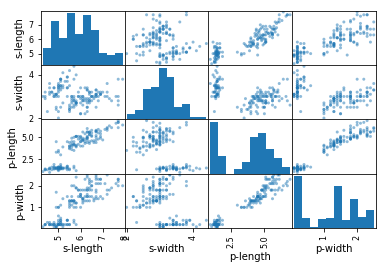

In [14]:
# multivariate plots

# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [20]:
# evaluate algo

# create a validation dataset using split train-test
array= dataset.values
X= array[:,0:4]
Y=array[:,4]
validation_size=.20
seed=7
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [22]:
# spot check algo.
models=[]
models.append(('LR', LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results=[]
names=[]

for name, model in models:
    kfold= KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy' )
    results.append(cv_results)
    names.append(name)
    msg= (name, cv_results.mean(), cv_results.std())
    print("{0}".format(msg))

('LR', 0.9666666666666666, 0.04082482904638632)
(' LDA ', 0.975, 0.03818813079129868)
(' KNN ', 0.9833333333333332, 0.03333333333333335)
(' CART ', 0.975, 0.03818813079129868)
(' NB ', 0.975, 0.053359368645273735)
('SVM', 0.9916666666666666, 0.025000000000000012)


/home/kuldeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kuldeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kuldeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kuldeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kuldeep/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

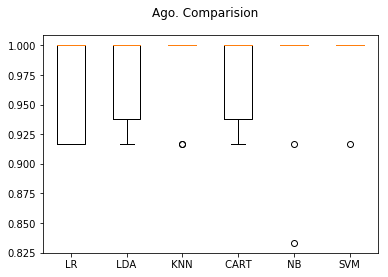

In [23]:
# compare algo
fig= pyplot.figure()
fig.suptitle('Ago. Comparision')
ax= fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [26]:
# make predictions
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions= knn.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, predictions), '\n')
print('Confusion matrix: ', confusion_matrix(y_test, predictions),'\n')
print('Classification report: ', classification_report(y_test, predictions),'\n')

Accuracy score:  0.9 

Confusion matrix:  [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]] 

Classification report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30
 

